In [28]:
from sklearn.datasets import load_iris
from utils import ruin_data
import pandas as pd
import seaborn as sns

Scikit-learn offers some toy datasets. For this notebook, we will use the iris dataset, which can be loaded as follows:

In [29]:
data, targets = load_iris(return_X_y=True, as_frame=True)

### Brief excursus on obtaining datasets
scikit learn offers some convenient way to access the datasets hosted at the openml.org dataset repository (can be searched [here](https://www.openml.org/search?type=data&sort=runs&status=active))

```python
from sklearn.datasets import fetch_openml

data_openml = fetch_openml(name='soybean', version=1) # by name
data_openml = fetch_openml(data_id=42) # or by id
```

In many cases, datasets are provided as DataFrames

In [30]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
targets

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

# Preprocessing
Before we analyse the data, it is crucial to inspect it. 
In this case, we know it is "clean", but with real-life data it may not be the case.
So, we can introduce some issues in the data :)

In [32]:
data = ruin_data(data)
data["target"] = targets


## Check for missing values
Some data points may be missing from the dataset. use the `describe` method to see some information.

In [33]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,147.000000,150.000000,150.000000,150.000000,150.000000
mean,5.835374,69.702667,3.758000,1.199333,1.000000
std,0.831223,816.247145,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.375000,5.100000,1.800000,2.000000
max,7.900000,10000.000000,6.900000,2.500000,2.000000


Looking at the counts, it seems like this is the case. You can choose to (depending on the situation):
- remove the rows where data is missing (using `dropna` method)
- replace the missing data with the mean of the column (`fillna` using `data.mean()`)
- remove the column where data is missing

In [34]:
data = data.dropna()
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.835374,71.068027,3.738095,1.187075,0.986395
std,0.831223,824.533694,1.775223,0.761602,0.819174
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.550000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.400000,5.100000,1.800000,2.000000
max,7.900000,10000.000000,6.900000,2.500000,2.000000


## Check for outliers
Outliers can be identified visually and using e.g. z-score or IQR
Try using `sns.pairplot` and coloring by target.

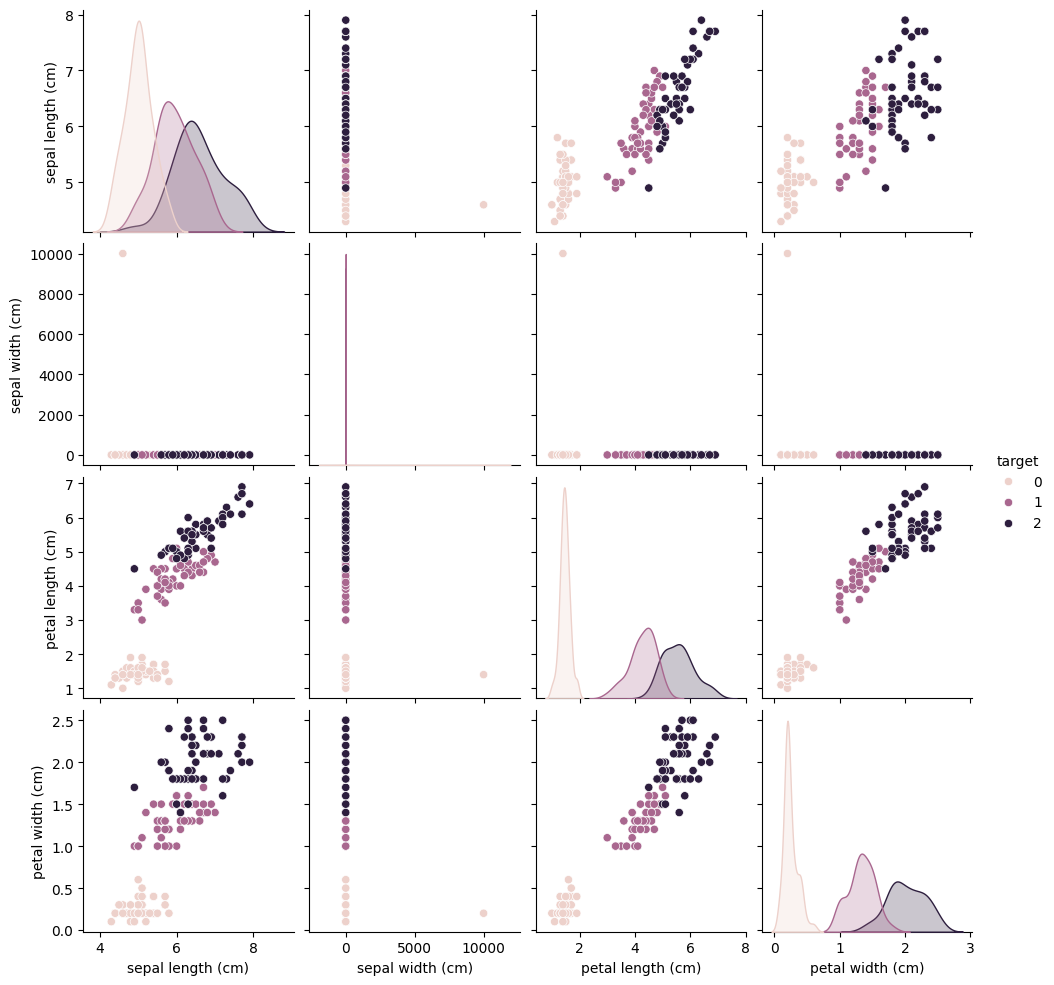

In [51]:
sns.pairplot(data, hue = "target")

you can also use `zscore` from `scipy.stats` to calculate z scores and select points with a score larger than a certain threshold.

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            -0.887714         -0.082227          -1.321574         -1.300482   
1            -1.129146         -0.082836          -1.321574         -1.300482   
2            -1.370578         -0.082592          -1.378098         -1.300482   
3            -1.491294         -0.082714          -1.265051         -1.300482   
4            -1.008430         -0.082105          -1.321574         -1.300482   
..                 ...               ...                ...               ...   
142           1.164457         -0.082592           1.221985          1.466291   
143           1.043741         -0.082471           1.108938          1.729794   
144           0.560877         -0.083444           0.713273          0.939287   
145           0.440162         -0.082349           0.939368          1.466291   
146           0.078014         -0.082836           0.769797          0.807536   

       target  
0   -1.2082

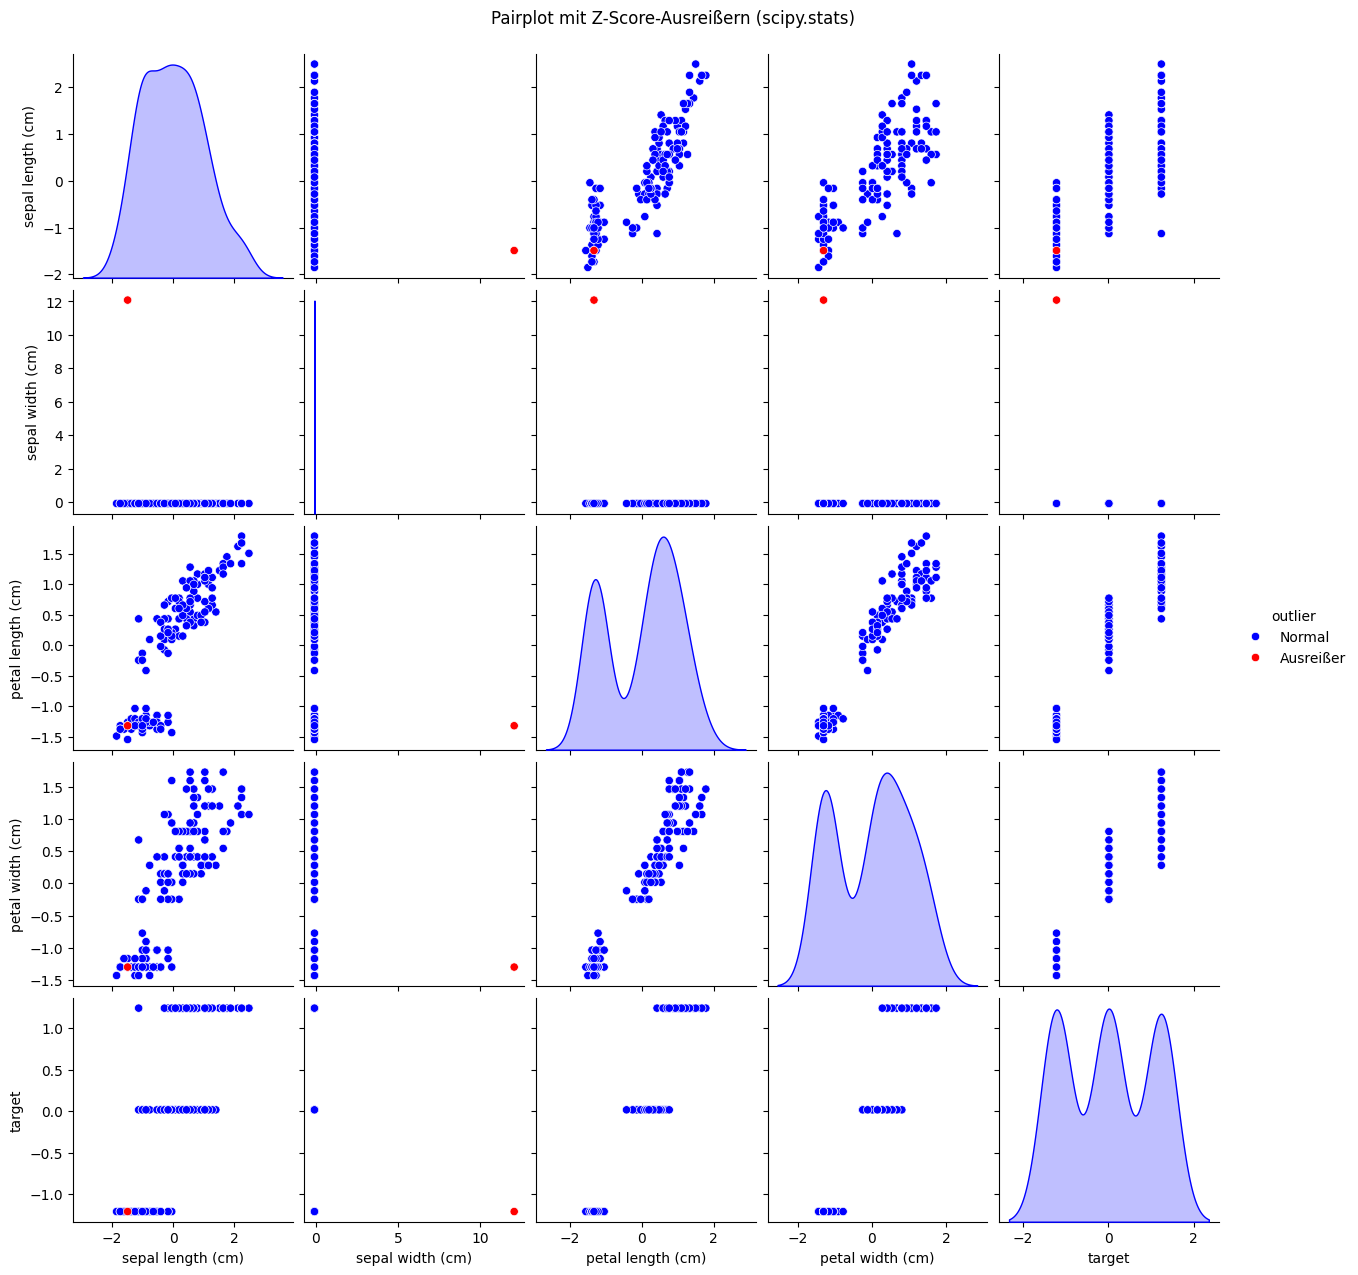

In [36]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np

z = zscore(data)

z_df = pd.DataFrame(z, columns=data.columns)
print(z_df)

# 4. Ausreißer-Logik: Wenn ein Z-Score > 3 oder < -3 in einer Zeile → Ausreißer
is_outlier = (np.abs(z_df) > 3).any(axis=1)

# 5. Kategorie hinzufügen
z_df["outlier"] = np.where(is_outlier, "Ausreißer", "Normal")

print(z_df)

# 6. Pairplot mit Farbe nach Ausreißerstatus
sns.pairplot(z_df, hue="outlier", palette={"Normal": "blue", "Ausreißer": "red"})
plt.suptitle("Pairplot mit Z-Score-Ausreißern (scipy.stats)", y=1.02)
plt.show()

use pairplot again

## Data scaling
Some techniques based on distances can suffer from data having different scales in different dimensions. 
Try some other scaling methods.

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply scaling
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


# Exploratory analysis

You can plot the correlation matrix between the features using a `heatmap` from seaborn, together with the `corr` method of a dataframe.
Set `vmax` and `vmin` appropriately.

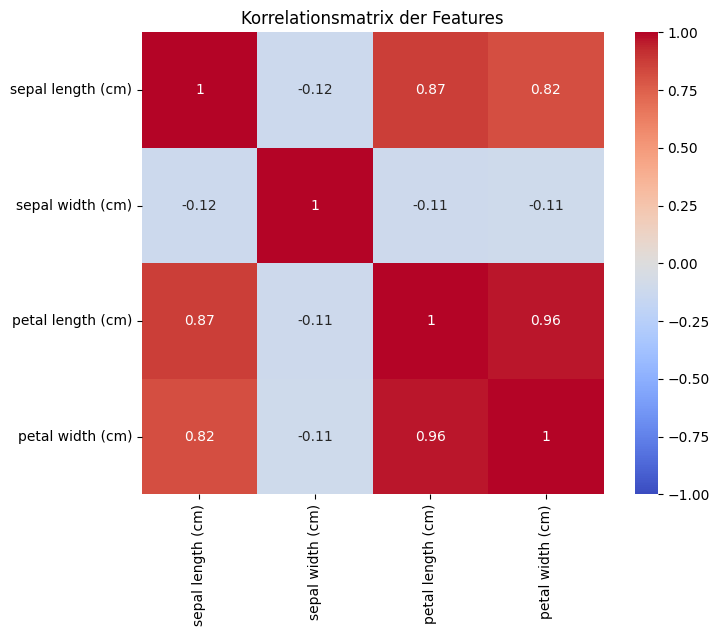

In [38]:
# Korrelationsmatrix berechnen
features = data.drop("target", axis=1)
corr_matrix = features.corr()

# Heatmap plotten
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Korrelationsmatrix der Features")
plt.show()

Convert the data to numpy format (use `to_numpy()` method) and save it (use `np.save()`)

In [ ]:
data_np = data.to_numpy()
np.save("data_in_nparray", data_np) #Speichert data_np im aktuellen Arbeitsverzeichnis, die Variable kann jeder Zeit durch np.load("iris_numeric.npy") wieder geladen werden

Don't forget to separate the features and the labels

In [47]:
X = data_np[:, :-1]
y = data_np[:, -1]

In [48]:
X

array([[5.1e+00, 3.5e+00, 1.4e+00, 2.0e-01],
       [4.9e+00, 3.0e+00, 1.4e+00, 2.0e-01],
       [4.7e+00, 3.2e+00, 1.3e+00, 2.0e-01],
       [4.6e+00, 3.1e+00, 1.5e+00, 2.0e-01],
       [5.0e+00, 3.6e+00, 1.4e+00, 2.0e-01],
       [5.4e+00, 3.9e+00, 1.7e+00, 4.0e-01],
       [4.6e+00, 3.4e+00, 1.4e+00, 3.0e-01],
       [5.0e+00, 3.4e+00, 1.5e+00, 2.0e-01],
       [4.4e+00, 2.9e+00, 1.4e+00, 2.0e-01],
       [4.9e+00, 3.1e+00, 1.5e+00, 1.0e-01],
       [5.4e+00, 3.7e+00, 1.5e+00, 2.0e-01],
       [4.8e+00, 3.4e+00, 1.6e+00, 2.0e-01],
       [4.8e+00, 3.0e+00, 1.4e+00, 1.0e-01],
       [4.3e+00, 3.0e+00, 1.1e+00, 1.0e-01],
       [5.8e+00, 4.0e+00, 1.2e+00, 2.0e-01],
       [5.7e+00, 4.4e+00, 1.5e+00, 4.0e-01],
       [5.4e+00, 3.9e+00, 1.3e+00, 4.0e-01],
       [5.1e+00, 3.5e+00, 1.4e+00, 3.0e-01],
       [5.7e+00, 3.8e+00, 1.7e+00, 3.0e-01],
       [5.1e+00, 3.8e+00, 1.5e+00, 3.0e-01],
       [5.4e+00, 3.4e+00, 1.7e+00, 2.0e-01],
       [5.1e+00, 3.7e+00, 1.5e+00, 4.0e-01],
       [4.

In [49]:
y 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [50]:
np.save("X", X)
np.save("y", y)